In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd

from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA, SLSQP, SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap,RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data
from sklearn.model_selection import train_test_split

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
seed = 1376
algorithm_globals.random_seed = seed
Iris_data=pd.read_csv('Iris.csv')
Iris_data.drop(['Id'], axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
feature_cols = [
    'SepalLengthCm',
    'SepalWidthCm',
    'PetalLengthCm',
    'PetalWidthCm'
]

target_col = ['Species']

In [4]:
xtrain = Iris_data[feature_cols]
ytrain = Iris_data[target_col]#.astype(int)

ytrain_new = pd.get_dummies(ytrain, columns=["Species"])

x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain_new, test_size=0.25, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

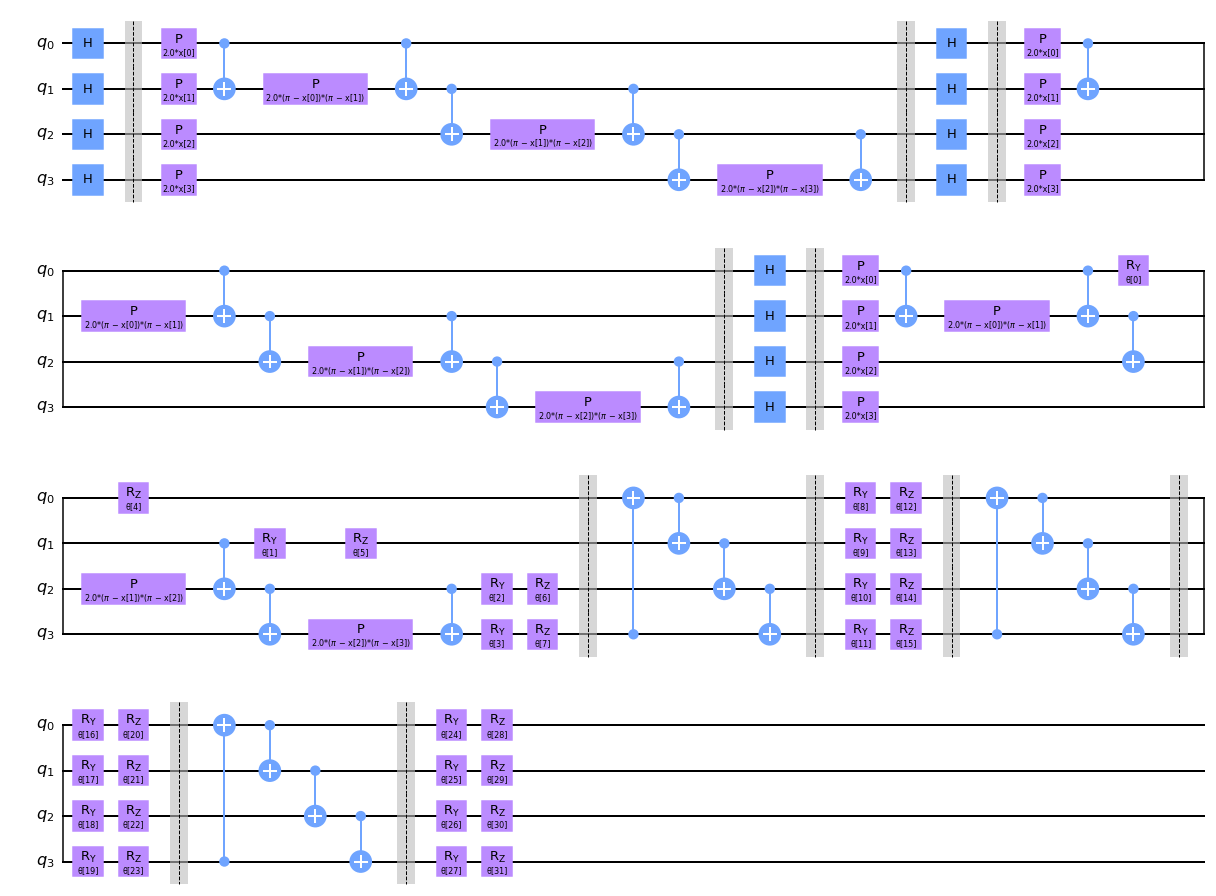

In [5]:
feature_map = ZZFeatureMap(feature_dimension=4, reps=3, entanglement='linear', insert_barriers=True)

ansatz = TwoLocal(num_qubits=4, reps=3, rotation_blocks=['ry','rz'], 
               entanglement_blocks='cx', entanglement='circular', insert_barriers=True)

circuit = feature_map.compose(ansatz)
circuit.decompose().draw(output='mpl')

# Noiseless simulation with COBYLA optimizer

In [6]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
vqc = VQC(feature_map=feature_map,ansatz=ansatz, optimizer=COBYLA(maxiter=250), quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),shots=1024,seed_simulator=seed,seed_transpiler=seed),callback=callback_graph)

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(x_train, y_train.to_numpy())

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(x_test, y_test.to_numpy())
print(f"Testing accuracy: {score:0.2f}")

# Noiseless simulation with SPSA Optimizer

In [ ]:
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=SPSA(maxiter=100),
          quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                           shots=1024,
                                           seed_simulator=seed,
                                           seed_transpiler=seed),callback=callback_graph
          )

In [ ]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
vqc.fit(x_train, y_train.to_numpy())

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(x_test, y_test.to_numpy())
print(f"Testing accuracy: {score:0.2f}")